In [1]:
import cc.atlas as atlas
import cc.cartography as cartography

In [14]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use( '~/repos/clean-bold/clean-bold.mplstyle' )

# Load Data

In [6]:
fp = '../data/example_atlas/projection.h5'
c = cartography.Cartographer.from_hdf5( fp )

# Generate Map

In [7]:
coords, inds, pairs = c.map( 'Hafen2019' )

/Users/zhafen/repos/cc/cc/cartography.py:1179: RuntimeWarning: invalid value encountered in arccos
  d_matrix = np.arccos( self.cospsi_matrix )
100%|██████████| 8/8 [00:00<00:00, 4816.20it/s]


# Plot

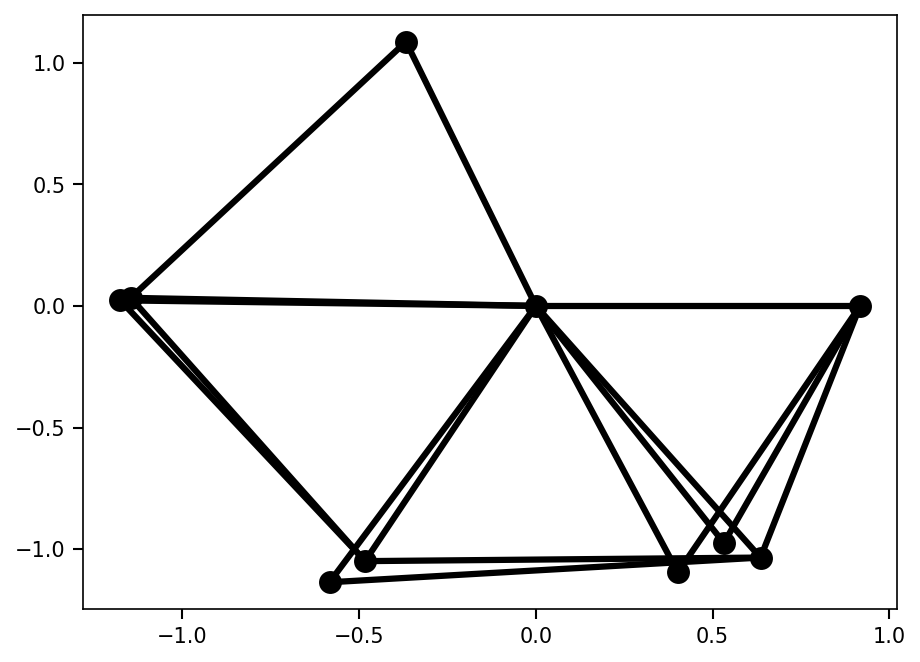

In [21]:
fig = plt.figure()
ax = plt.gca()

ax.scatter(
    coords[:,0],
    coords[:,1],
    color = 'k',
)

for pair in pairs:
    ax.plot(
        coords[pair][:,0],
        coords[pair][:,1],
        color = 'k',
    )

In [28]:
import numpy as np

In [30]:
d_ij = np.linalg.norm( coords - coords[inds[0]], axis=1 )

In [33]:
psi_ij = [ c.psi( c.publications[inds[0]], _, scaling=1. )[0] for _ in c.publications ]

In [39]:
pairs

array([[8, 9],
       [6, 9],
       [6, 8],
       [7, 9],
       [7, 8],
       [5, 7],
       [5, 8],
       [3, 9],
       [3, 8],
       [1, 7],
       [1, 8],
       [4, 5],
       [4, 8],
       [2, 5],
       [2, 8],
       [0, 4],
       [0, 8]])

In [34]:
psi_ij

[1.3093843837156098,
 1.2236716907375589,
 1.2760860516668031,
 1.2108595348806006,
 1.2692612636166027,
 1.1190687883970536,
 1.0478261936909885,
 1.0722033490355543,
 0.0,
 0.9174032678145266]

In [35]:
d_ij

array([1.14620252, 1.27727814, 1.17601297, 1.16692526, 1.14691304,
       1.15512046, 1.11020043, 1.21420606, 0.        , 0.91740327])

In [36]:
c.publications

array(['VandeVoort2018a', 'Stern2018', 'Howk2017', 'Garrison-kimmel2017',
       'Hopkins2017', 'Hafen2016', 'Muratov2016', 'VandeVoort2016',
       'Hafen2019', 'Hafen2019a'], dtype='<U19')

In [37]:
coords

array([[-0.36756891,  1.08566722],
       [-0.58379659, -1.13605501],
       [-1.1757937 ,  0.02270869],
       [ 0.4017658 , -1.09558149],
       [-1.14643473,  0.03312007],
       [-0.48331762, -1.04914601],
       [ 0.53206373, -0.97439888],
       [ 0.63565562, -1.03452322],
       [ 0.        ,  0.        ],
       [ 0.91740327,  0.        ]])

In [38]:
inds

array([8, 9, 6, 7, 5, 3, 1, 4, 2, 0])